<a href="https://colab.research.google.com/github/MannoBak/PremierRepo/blob/master/model_hopital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.8361297539149888
              precision    recall  f1-score   support

           1       0.84      1.00      0.91      1495
           2       0.00      0.00      0.00       235
           3       0.00      0.00      0.00        49
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         1

    accuracy                           0.84      1788
   macro avg       0.17      0.20      0.18      1788
weighted avg       0.70      0.84      0.76      1788



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


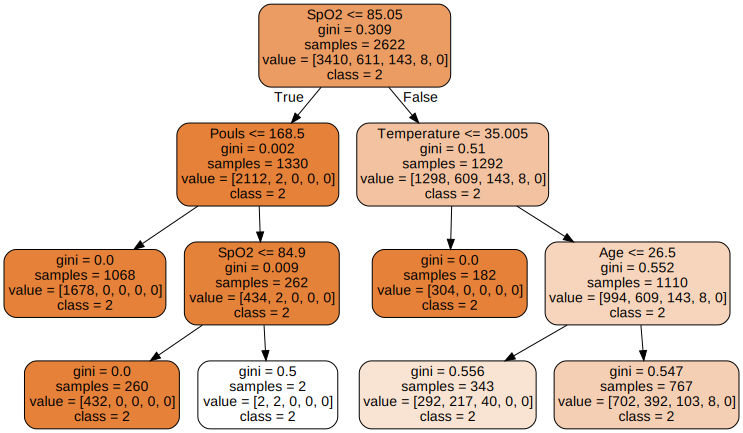

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import graphviz
from sklearn.tree import export_graphviz

# Chargement des données (à adapter selon ton format de fichier)
data = pd.read_csv('my_datasheet_80000.csv')

# Séparation des features et de la target
features = ['Age', 'Sexe', 'Enceinte', 'SpO2', 'Frquce_Rprtr(rpm)', 'Pouls', 'ECG', 'PA', 'Temperature', 'IMC']
X = data[features]
y = data['Priorite']

X = pd.get_dummies(X, columns=['Sexe', 'ECG'])

# Séparation en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Création et entraînement du modèle
model = RandomForestClassifier(n_estimators=100, random_state=42 , max_depth=3)
model.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = model.predict(X_test)

# Évaluation du modèle
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualisation de l'arbre de décision( le premier arbre '0')
dot_data = export_graphviz(model.estimators_[0], out_file=None, feature_names=X.columns,
                           class_names=['2', '1', '3', '4', '5'], filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

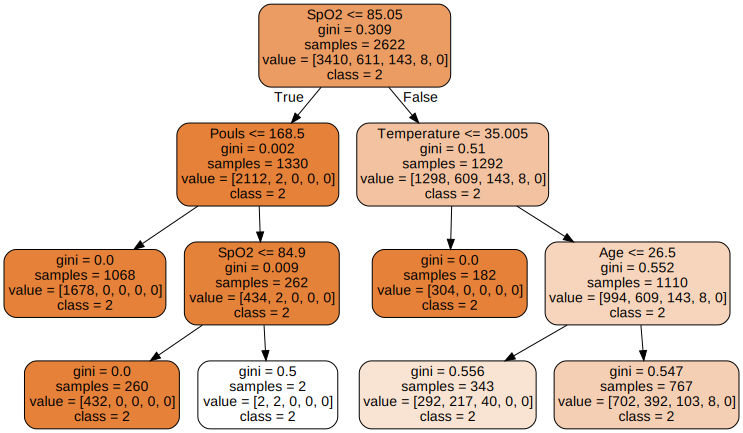

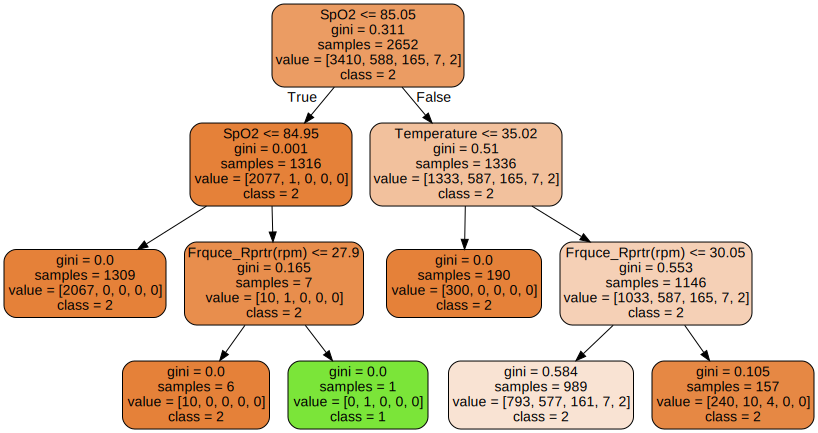

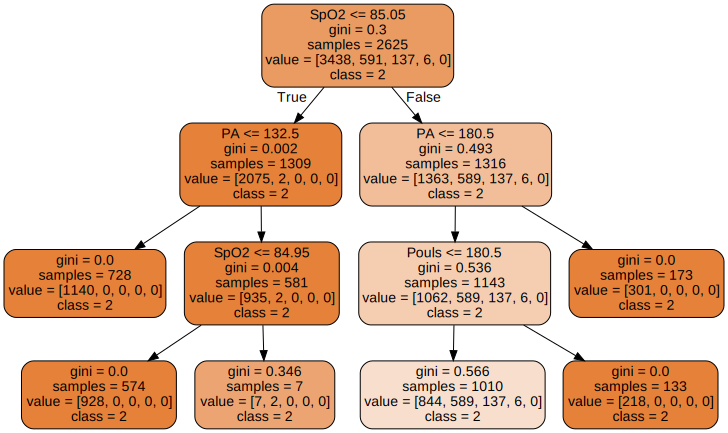

In [18]:
#visualiser un certain nombre d'arbres
for i in range(3):
    dot_data = export_graphviz(model.estimators_[i], out_file=None, feature_names=X.columns,
                               class_names=['2', '1', '3', '4', '5'], filled=True, rounded=True)
    graph = graphviz.Source(dot_data)
    display(graph)